In [ ]:
import numpy as np
import math
import itertools

import scipy as sp
from scipy import optimize
from scipy.special import eval_hermite,roots_hermite, gamma, factorial, binom
from scipy.sparse.linalg import eigsh as sparse_eigsh

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Import my modules
from Auxiliar_Module import Auxiliar
from Models import GaussianModel, OneCobosonGauss

# Package for multiple precision
import mpmath as mp
mp.mp.dps = 30
print(mp.mp)

cm_in_inches = Auxiliar.cm_in_inches()

Mpmath settings:
  mp.prec = 103               [default: 53]
  mp.dps = 30                 [default: 15]
  mp.trap_complex = False     [default: False]


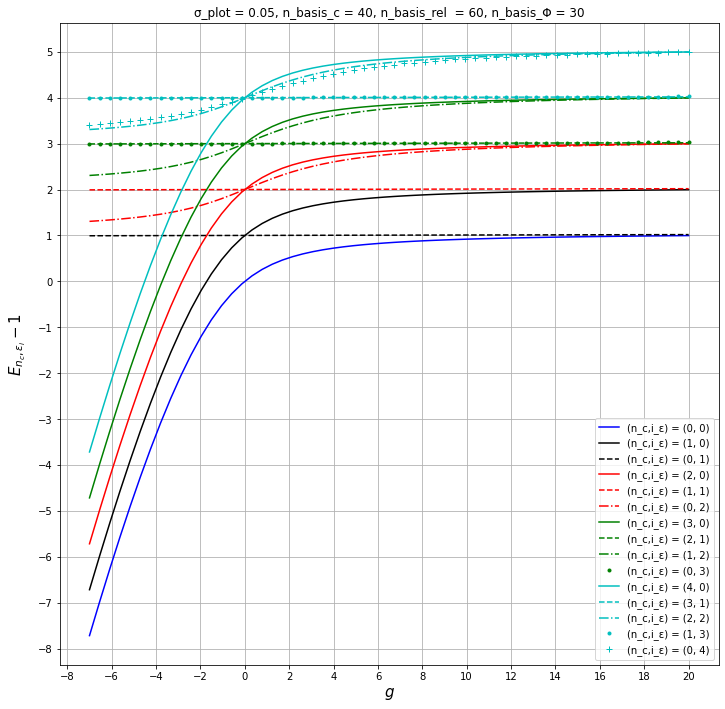

In [6]:

# Plot of E_{n_c,ϵ_i}-1 

# Basis parameters for eigenstate determination

g_arr   = np.linspace(-7,20,60)
σ_plot = 0.05

n_basis_c    = 40
n_basis_rel  = 60
n_basis_Φ    = int(n_basis_rel/2)

TBM_tensor = Auxiliar.TBM_tensor_calc(n_basis_c, n_basis_rel)
model_g_arr = [GaussianModel(g_plot, σ_plot, n_basis_rel, n_basis_Φ, TBM_tensor) for g_plot in g_arr]

fig, axs = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (30*cm_in_inches,30*cm_in_inches))

qnumsArray_collors  = {(0,0):'b-', 
                       (1,0):'k-', (0,1):'k--',
                       (2,0):'r-', (1,1):'r--', (0,2):'r-.',
                       (3,0):'g-', (2,1):'g--', (1,2):'g-.', (0,3):'g.',
                       (4,0):'c-', (3,1):'c--', (2,2):'c-.', (1,3):'c.', (0,4):'c+'}
            
qnumsArray = qnumsArray_collors.keys()

for qnums in qnumsArray:
    
    n_c = qnums[0]
    i_ε = qnums[1]
    collor = qnumsArray_collors[qnums]
    
    E_g_arr = np.array([ model.oneCoboson(n_c,i_ε).energy() for model in model_g_arr])
    
    axs.plot(g_arr, E_g_arr - 1.0,
             collor,
             label = f'(n_c,i_ε) = {qnums}')
    
axs.set_xlabel('$g$', fontsize = 15)
axs.set_ylabel('$E_{n_c,\epsilon_i}-1$', rotation = 'vertical', labelpad = 10, fontsize = 15)
axs.set_xticks(np.arange(-8, 22, 2.0))
axs.set_yticks(np.arange(-8, 6 , 1.0))
axs.legend()
axs.set_title(f"σ_plot = {σ_plot}, n_basis_c = {n_basis_c}, n_basis_rel  = {n_basis_rel}, n_basis_Φ = {n_basis_Φ}")
axs.grid()

In [ ]:
# Plot of E_{n_c,ϵ_i}-1 

# Basis parameters for eigenstate determination

g_arr   = np.linspace(-7,20,60)
σ_plot = 0.05

n_basis_c    = 40
n_basis_rel  = 40
n_basis_Φ    = 30

TBM_tensor = Auxiliar.TBM_tensor_calc(n_basis_c, n_basis_rel)
model_g_arr = [GaussianModel(g_plot, σ_plot, n_basis_rel, n_basis_Φ, TBM_tensor) for g_plot in g_arr]

fig, axs = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (30*cm_in_inches,30*cm_in_inches))

qnumsArray_collors  = {(0,0):'b-', 
                       (1,0):'k-', (0,1):'k--',
                       (2,0):'r-', (1,1):'r--', (0,2):'r-.',
                       (3,0):'g-', (2,1):'g--', (1,2):'g-.', (0,3):'g.',
                       (4,0):'c-', (3,1):'c--', (2,2):'c-.', (1,3):'c.', (0,4):'c+'}
            
qnumsArray = qnumsArray_collors.keys()

for qnums in qnumsArray:
    
    n_c = qnums[0]
    i_ε = qnums[1]
    collor = qnumsArray_collors[qnums]
    
    E_g_arr = np.array([ model.oneCoboson(n_c,i_ε).energy() for model in model_g_arr])
    
    axs.plot(g_arr, E_g_arr - 1.0,
             collor,
             label = f'(n_c,i_ε) = {qnums}')
    
axs.set_xlabel('$g$', fontsize = 15)
axs.set_ylabel('$E_{n_c,\epsilon_i}-1$', rotation = 'vertical', labelpad = 10, fontsize = 15)
axs.set_xticks(np.arange(-8, 22, 2.0))
axs.set_yticks(np.arange(-8, 6 , 1.0))
axs.legend()
axs.set_title(f"σ_plot = {σ_plot}, n_basis_c = {n_basis_c}, n_basis_rel  = {n_basis_rel}, n_basis_Φ = {n_basis_Φ}")
axs.grid()